<a href="https://colab.research.google.com/github/gowthaman25/DnCNN-keras/blob/master/vsearch_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import glob
import os
import cv2



#from cnn_model import cnn_model 
from google.colab import drive
drive.mount('/content/drive')

img_width, img_height = 224, 224

if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 


4.0.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data_dir =  '/content/drive/My Drive/VSEARCH PROJECT/v_data/train'
validation_data_dir = '/content/drive/My Drive/VSEARCH PROJECT/v_data/test'
nb_train_samples =400
nb_validation_samples = 1
epochs = 50
batch_size = 16


In [36]:
 

model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

model.compile(loss ='binary_crossentropy', 
					optimizer ='rmsprop', 
				metrics =['accuracy']) 

train_datagen = ImageDataGenerator( 
				rescale = 1. / 255, 
				shear_range = 0.2, 
				zoom_range = 0.2, 
			horizontal_flip = True) 

test_datagen = ImageDataGenerator(rescale = 1. / 255) 

train_generator = train_datagen.flow_from_directory(train_data_dir, 
							target_size =(img_width, img_height), 
					batch_size = batch_size, class_mode ='binary') 

validation_generator = test_datagen.flow_from_directory( 
									validation_data_dir, 
				target_size =(img_width, img_height), 
		batch_size = batch_size, class_mode ='binary') 

model.fit_generator(train_generator, 
	steps_per_epoch = nb_train_samples // batch_size, 
	epochs = epochs, validation_data = validation_generator, 
	validation_steps = nb_validation_samples // batch_size) 

model.save_weights('model_saved.h5') 
model.summary()
print(model.layers[0].input_shape)



Found 400 images belonging to 2 classes.
Found 1 images belonging to 2 classes.
Epoch 1/1
25/25 [==============================] - 6s 239ms/step - loss: 1.1638 - accuracy: 0.5575 - val_loss: 0.2800 - val_accuracy: 1.0000
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 223, 223, 32)      416       
_________________________________________________________________
activation_36 (Activation)   (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_37 (Activation)   (None, 110, 110, 32)      0         
_______________________________

0
Predicted Image Planes


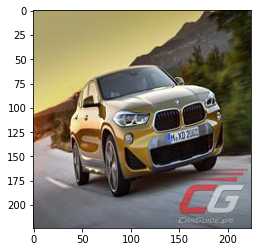

In [35]:

from keras.preprocessing import image


img = image.load_img('13.jpg', target_size=(224, 224))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
print(result[0][0])
#plt.title(get_label_name(result[0][0]))

if result[0][0] == '0':
  output = 'Cars'
  print('1111')
elif result[0][0] == '1' :
  output ='Planes'

print('Predicted Image',output)

